In [1]:
#START OF NEW Coding 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import mdshare
import mdtraj as md
import MDAnalysis as mda
#import nglview
import pyemma
from pyemma.util.contexts import settings
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as peplt
%pylab inline

import pyemma

pyemma.__version__

'2.5.5+9.ge9257b9.dirty'


import numpy as np
%pylab inline

print('heyo')

import pyemma.coordinates as coor

# some helper funcs
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res

def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
heyo


In [2]:

trajfile = ["/home1/wt/c1-sim1/c1-protein.xtc", "/home1/wt/c2-sim1/c2-protein.xtc", "/home1/wt/c3-sim1/c3-protein.xtc", "/home1/wt/c4-sim1/c4-protein.xtc", "/home1/wt/c5-sim1/c5-protein.xtc", "/home1/wt/c6-sim1/c6-protein.xtc", "/home1/wt/c7-sim1/c7-protein.xtc", "/home1/wt/c8-sim1/c8-protein.xtc", "/home1/wt/c9-sim1/c9-protein.xtc", "/home1/wt/c10-sim1/c10-protein.xtc", "/home1/wt/c1-sim2/c1-protein.xtc", "/home1/wt/c2-sim2/c2-protein.xtc", "/home1/wt/c3-sim2/c3-protein.xtc", "/home1/wt/c4-sim2/c4-protein.xtc", "/home1/wt/c5-sim2/c5-protein.xtc", "/home1/wt/c6-sim2/c6-protein.xtc", "/home1/wt/c7-sim2/c7-protein.xtc", "/home1/wt/c8-sim2/c8-protein.xtc", "/home1/wt/c9-sim2/c9-protein.xtc", "/home1/wt/c10-sim2/c10-protein.xtc", "/home1/wt/c1-sim3/c1-protein.xtc", "/home1/wt/c2-sim3/c2-protein.xtc", "/home1/wt/c3-sim3/c3-protein.xtc", "/home1/wt/c4-sim3/c4-protein.xtc", "/home1/wt/c5-sim3/c5-protein.xtc", "/home1/wt/c6-sim3/c6-protein.xtc", "/home1/wt/c7-sim3/c7-protein.xtc", "/home1/wt/c8-sim3/c8-protein.xtc", "/home1/wt/c9-sim3/c9-protein.xtc", "/home1/wt/c10-sim3/c10-protein.xtc"
]
topfile = '/home1/wt/wt-protein.gro'


xtc_traj = md.load (trajfile, top='/home1/wt/wt-protein.gro')

pdb = md.load ('/home1/wt/wt-protein.gro')

In [3]:
import MDAnalysis as mda

# Load your .gro and .xtc files
universe = mda.Universe("/home1/al/al-protein.gro", "/home1/al/c1-sim1/c1-protein.xtc")

# Get timestep from the first two frames
timestep = universe.trajectory[1].time - universe.trajectory[0].time
print(f"Timestep: {timestep} ps")


Timestep: 10.0 ps


/home/rajarshi/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:202: UserWarning: Cannot write lock/offset file in same location as /home1/al/c1-sim1/c1-protein.xtc. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/home/rajarshi/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:258: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/home1/al/c1-sim1/.c1-protein.xtc_offsets.npz'
  warnings.warn(f"Couldn't save offsets because: {e}")


In [4]:
feat = pyemma.coordinates.featurizer(pdb)
# heavy_atom_distance_pairs = feat.pairs(feat.select_Heavy())


feat.add_backbone_torsions(periodic=True, cossin=True)
data = pyemma.coordinates.load(trajfile, features=feat)




inp = coor.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length)
print('number of dimension = ',inp.dimension())

lag=1
tica_obj = coor.tica(inp, lag=lag, dim=2, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
# Y = tica_obj.get_output()[0]

Y7 = [
    tica_obj.get_output()[0], 
    tica_obj.get_output()[1], 
    tica_obj.get_output()[2], 
    tica_obj.get_output()[3],
    tica_obj.get_output()[4],
    tica_obj.get_output()[5],
    tica_obj.get_output()[6],
    tica_obj.get_output()[7],
    tica_obj.get_output()[8],
    tica_obj.get_output()[9],
    tica_obj.get_output()[10],
    tica_obj.get_output()[11],
    tica_obj.get_output()[12],
    tica_obj.get_output()[13],
    tica_obj.get_output()[14],
    tica_obj.get_output()[15],
    tica_obj.get_output()[16],
    tica_obj.get_output()[17],
    tica_obj.get_output()[18],
    tica_obj.get_output()[19],
    tica_obj.get_output()[20],
    tica_obj.get_output()[21],
    tica_obj.get_output()[22],
    tica_obj.get_output()[23],
    tica_obj.get_output()[24],
    tica_obj.get_output()[25],
    tica_obj.get_output()[26],
    tica_obj.get_output()[27],
    tica_obj.get_output()[28]
    ]

Y = np.vstack(Y7)

# Y = tica_obj.get_output()[0]
print('Projected data shape = ', Y.shape)

# feat2 = coor.featurizer(topfile)
# feat2.add_distances_ca(periodic=False)
# Y = tica_obj.get_output()[0]


# inp = coor.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

# Y = np.vstack(tica_obj.get_output())
print('Projected data shape = ', Y.shape)

# feat2 = coor.featurizer(topfile)
# feat2.add_distances_ca(periodic=False)


Obtaining file info:   0%|                               | 0/29 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/29 [00:00<?, ?it/s]

Obtaining file info:   0%|                               | 0/29 [00:00<?, ?it/s]

trajectory length =  <bound method DataSource.trajectory_length of <pyemma.coordinates.data.feature_reader.FeatureReader object at 0x7fdac9bc8550>>
number of dimension =  48


/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                             | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/29 [00:00<?, ?it/s]

Projected data shape =  (580029, 2)
trajectory length =  20001
number of dimension =  48
Projected data shape =  (580029, 2)


In [5]:
print(Y.shape)
print(type(Y))
Y1 = tica_obj.get_output()[0]

print(Y1.shape)
print(type(Y1))

(580029, 2)
<class 'numpy.ndarray'>


getting output of TICA:   0%|                                                      | 0/29 [00:00<?, ?it/s]

(20001, 2)
<class 'numpy.ndarray'>


[9 7 8 1 3 4]


Text(0.5, 0, 'time (10 ps)')

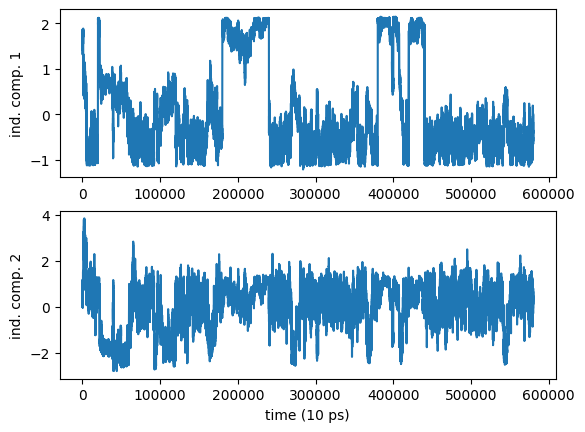

In [4]:
# inp_ = coor.source(trajfile, feat2)
# tica_obj_ = coor.tica(inp_, lag=lag, dim=2)
# Y4 = np.vstack(tica_obj.get_output())


subplot2grid((2,1),(0,0))
plot(Y[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y[:,1])
ylabel('ind. comp. 2')
xlabel('time (10 ps)')

#plt.savefig('1_TICA_plot_wt.png')

In [47]:
type(Y4)

list

In [5]:
cl = coor.cluster_kmeans(data=Y, k=75, max_iter = 500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


initialize kmeans++ centers:   0%|                       | 0/75 [00:00<?, ?it/s]

kmeans iterations:   0%|                                | 0/500 [00:00<?, ?it/s]

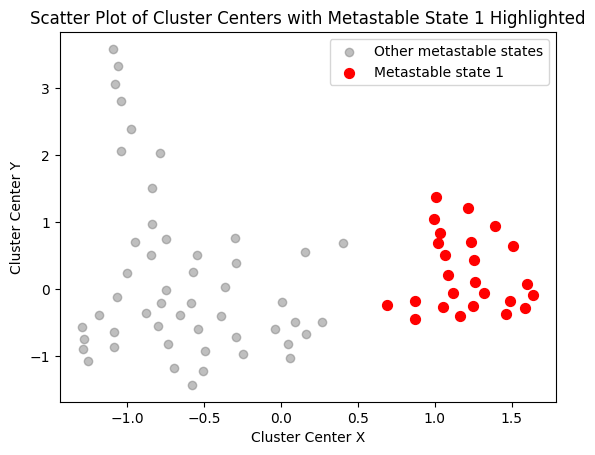

In [147]:
import matplotlib.pyplot as plt

# Metastable state assignments (B)
assignments = two_dist_msm.metastable_assignments

# Identify cluster centers (cc_x, cc_y) assigned to metastable state 1
metastable_indices = [i for i, state in enumerate(assignments) if state == 1]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]

# Scatter plot for all cluster centers
plt.scatter(cc_x, cc_y, color='gray', label='Other metastable states', alpha=0.5)

# Highlight cluster centers corresponding to metastable state 1
plt.scatter(metastable_x, metastable_y, color='red', label='Metastable state 1', s=50)

# Add labels and legend
plt.xlabel("Cluster Center X")
plt.ylabel("Cluster Center Y")
plt.title("Scatter Plot of Cluster Centers with Metastable State 1 Highlighted")
plt.legend()
plt.show()


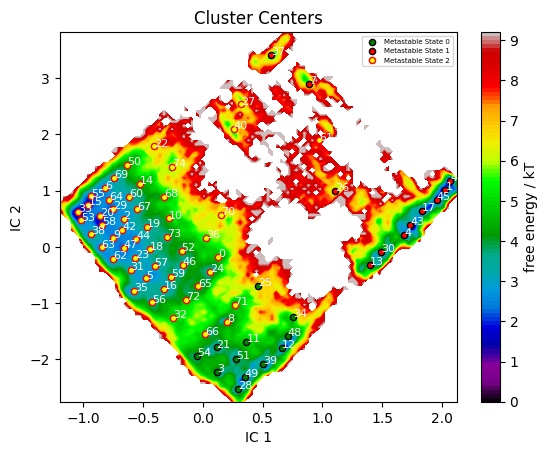

In [33]:
import matplotlib.pyplot as plt


M.pcca(3)
pcca_sets_6 = M.metastable_sets

B = M.metastable_assignments

pyemma.plots.plot_free_energy(*Y.T[0:2], legacy=False)


    # Highlight points corresponding to metastable state 0
metastable_indices = [i for i, state in enumerate(B) if state == 0]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]
plt.scatter(metastable_x, metastable_y, color='green',label='Metastable State 0', edgecolors ='black', s=20)

           
# Highlight points corresponding to metastable state 1
metastable_indices = [i for i, state in enumerate(B) if state == 1]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]
plt.scatter(metastable_x, metastable_y, color='red', label='Metastable State 1', edgecolors='black', s=20)

# Highlight points corresponding to metastable state 2
metastable_indices = [i for i, state in enumerate(B) if state == 2]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]
plt.scatter(metastable_x, metastable_y, color='yellow', label='Metastable State 2', edgecolors='red', s=20)


# # Highlight points corresponding to metastable state 3
# metastable_indices = [i for i, state in enumerate(B) if state == 3]
# metastable_x = cc_x[metastable_indices]
# metastable_y = cc_y[metastable_indices]
# plt.scatter(metastable_x, metastable_y, color='black', label='Metastable State 3', edgecolors='red', s=20)


# # Highlight points corresponding to metastable state 4
# metastable_indices = [i for i, state in enumerate(B) if state == 4]
# metastable_x = cc_x[metastable_indices]
# metastable_y = cc_y[metastable_indices]
# plt.scatter(metastable_x, metastable_y, color='black', label='Metastable State 4', edgecolors='yellow', s=20)


# # Highlight points corresponding to metastable state 5
# metastable_indices = [i for i, state in enumerate(B) if state == 5]
# metastable_x = cc_x[metastable_indices]
# metastable_y = cc_y[metastable_indices]
# plt.scatter(metastable_x, metastable_y, color='blue', label='Metastable State 5', edgecolors='violet', s=20)


# # Highlight points corresponding to metastable state 6
# metastable_indices = [i for i, state in enumerate(B) if state == 6]
# metastable_x = cc_x[metastable_indices]
# metastable_y = cc_y[metastable_indices]
# plt.scatter(metastable_x, metastable_y, color='violet', label='Metastable State 6', edgecolors='blue', s=20)


# # Highlight points corresponding to metastable state 7
# metastable_indices = [i for i, state in enumerate(B) if state == 7]
# metastable_x = cc_x[metastable_indices]
# metastable_y = cc_y[metastable_indices]
# plt.scatter(metastable_x, metastable_y, color='white', label='Metastable State 7', edgecolors='red', s=20)


            
            
            
            
# Highlight points corresponding to metastable state
metastable_indices_0 = [i for i, state in enumerate(B)]

for i in metastable_indices_0:
    plt.text(cc_x[i], cc_y[i], f"{i}", fontsize=8, color='white')




# Add labels, legend, and title
plt.xlabel("IC 1")
plt.ylabel("IC 2")
plt.title("Cluster Centers")
plt.legend()
plt.legend(fontsize=5)
plt.show()


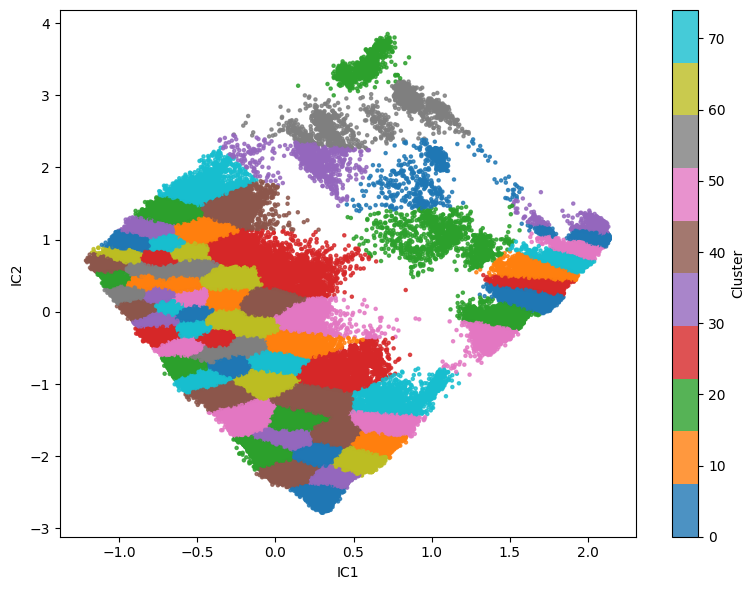

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=75, random_state=None)
cluster_labels = kmeans.fit_predict(Y)

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(Y[:,0], Y[:,1], c=cluster_labels, cmap='tab10', s=5, alpha=0.8)
ax.set_xlabel('IC1')
ax.set_ylabel('IC2')
# ax.set_title(f'K-means Clustering (k={num_clusters})')
fig.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:>,
 {'mappable': <matplotlib.contour.QuadContourSet at 0x7fb2fd572310>,
  'cbar': <matplotlib.colorbar.Colorbar at 0x7fb2fc167df0>})

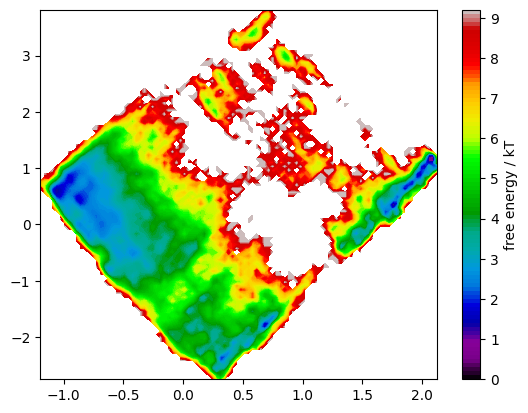

In [6]:
pyemma.plots.plot_free_energy(*Y.T[0:2], legacy=False)

<Figure size 600x400 with 0 Axes>

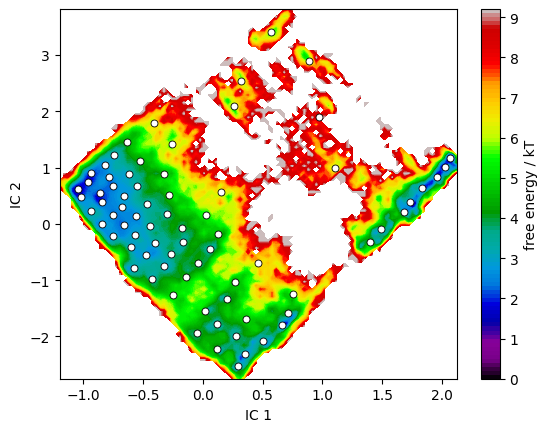

[ 1.7187188   0.8091986   1.7678028  ...  0.5656743  -0.53048
  0.45373788]


In [7]:
#contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
#plot(km.clustercenters[:,0],km.clustercenters[:,1], linewidth=0, marker='o')
# Y4 = tica_obj.get_output()
plt.figure(figsize=(6, 4)) 
short_dist_tica_concatenated = np.concatenate(Y)
pyemma.plots.plot_free_energy(*Y.T[0:2], legacy=False)

plot(cc_x,cc_y, linewidth=0, marker='o', markerfacecolor='white',  # Fill color of the marker
    markeredgecolor='black', markeredgewidth=0.6,  # Thickness of the border
    markersize=5 ) 
plt.xlabel('IC 1')
plt.ylabel('IC 2')
plt.show()
print(short_dist_tica_concatenated)


Obtaining file info:   0%|                               | 0/29 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/29 [00:00<?, ?it/s]

/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:

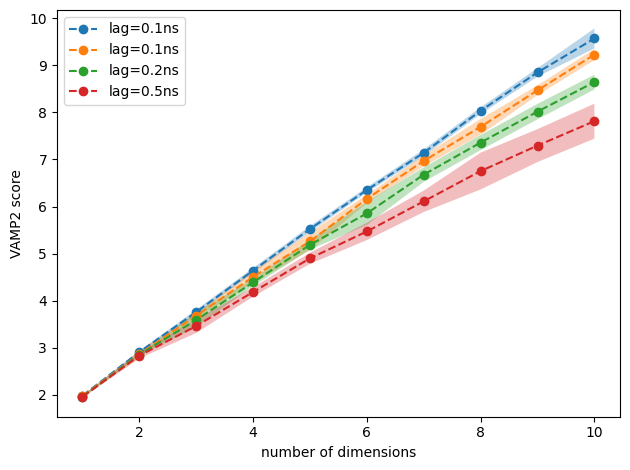

In [10]:
data = pyemma.coordinates.load(trajfile, features=feat)

def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


lags = [5,10,20,50]
dims = [i + 1 for i in range(10)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.01))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()

In [8]:
print('Mean values: ', np.mean(Y[0], axis=0))
print('Variances:   ', np.var(Y[0], axis=0))

Mean values:  1.2639587
Variances:    0.20680672


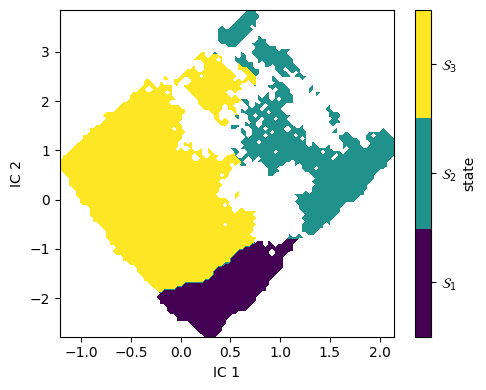

In [13]:
nstates = 3
M.pcca(3)
metastable_traj = M.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *Y[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [16]:
#MSM_Estimation
import pyemma.msm as msm
import pyemma.plots as mplt


lags = [1,2,5,10,20,50,100,200]

In [65]:
its = msm.its(dtrajs, lags=lags)

estimating MaximumLikelihoodMSM:   0%|                    | 0/8 [00:00<?, ?it/s]

In [6]:

dtrajs_concatenated = np.concatenate(cl.dtrajs)

In [11]:


lags = [1,2,5,50, 100, 150, 200 ,250]
its = pyemma.msm.its(cl.dtrajs, lags=lags, nits=10, errors='bayes')

estimating BayesianMSM:   0%|                             | 0/8 [00:00<?, ?it/s]

Process SpawnPoolWorker-15:
Process SpawnPoolWorker-16:
Process SpawnPoolWorker-13:
Process SpawnPoolWorker-14:
Process SpawnPoolWorker-12:
Process SpawnPoolWorker-11:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-10:
Process SpawnPoolWorker-9:
Process SpawnPoolWorker-8:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rajarshi/miniconda3/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/rajarshi/miniconda3/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rajarshi/miniconda3/lib/python3.9/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/home/rajarshi/miniconda3/lib/python3.9/site-packages/multiprocess/queues.py", line 367, in ge

KeyboardInterrupt: 

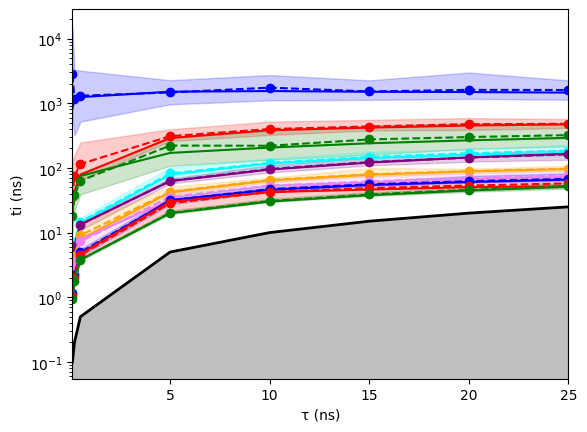

In [16]:
pyemma.plots.plot_implied_timescales(its, dt=0.1, units='(ns)' , marker='None');

plt.xlabel('τ (ns)')
plt.ylabel('ti (ns)')

import pyemma.msm as msm
import pyemma.plots as mplt

#mplt.plot_implied_timescales(its)

#plt.savefig('1_ITS_Plot_Nevv_double.png')


plt.savefig('1_ITS_PLOT_al.png')
#K means

In [40]:
dtrajs_concatenated = np.concatenate(cl.dtrajs)

In [7]:
print('hi')
# estimate_hidden_markov_model(dtrajs_concatenated, nstates, lag, mincount_connectivity='1/n', dt_traj='1 step', accuracy=0.001)
M = msm.estimate_markov_model(dtrajs_concatenated, 1000)
# M = msm.estimate_hidden_markov_model(dtrajs_concatenated, nstates =7, lag =1000, mincount_connectivity='1/n', dt_traj='1 step', accuracy=0.001)
# print(len(dtrajs[0]))

hi


In [8]:
print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

fraction of states used =  1.0
fraction of counts used =  1.0


(-0.5, 10.5)

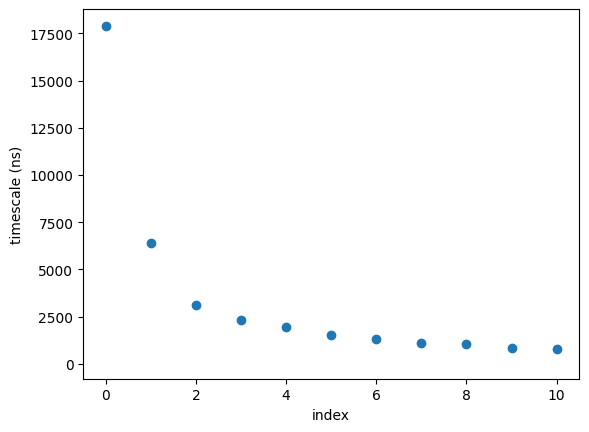

In [16]:
plot(M.timescales(),linewidth=0,marker='o')
xlabel('index'); ylabel('timescale (ns)'); xlim(-0.5,10.5)

(-0.5, 10.5)

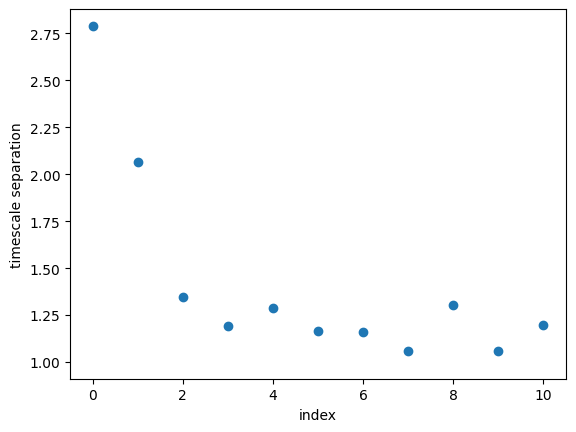

In [17]:
#plt.savefig('time_scalevsindex_double.png')

plot(M.timescales()[:-1]/M.timescales()[1:], linewidth=0,marker='o')
xlabel('index'); ylabel('timescale separation'); xlim(-0.5,10.5)

<AxesSubplot:>

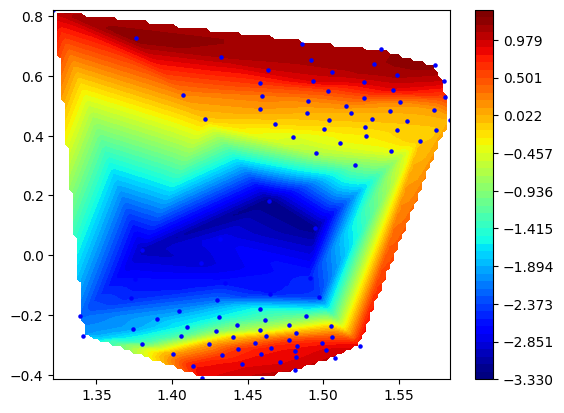

In [25]:
#plt.savefig('second_right_eigen_vector_double.png')

r3 = M.eigenvectors_right()[:,2]
mplt.scatter_contour(cc_x, cc_y, r3)

#plt.savefig('third_right_eigen_vector_double.png')

<AxesSubplot:>

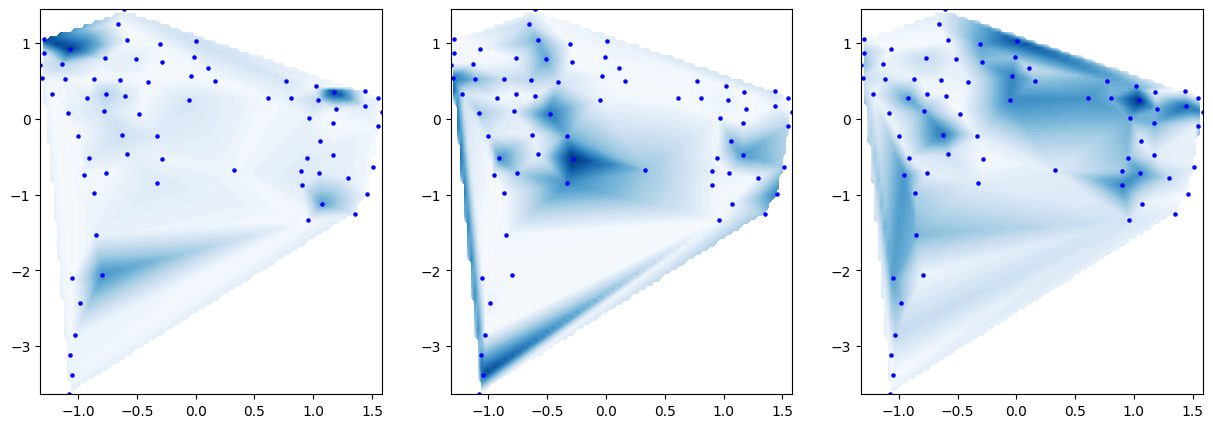

In [163]:
M.pcca(3)
pcca_dist = M.metastable_distributions
f, (ax1,ax2,ax3) = subplots(ncols=3)
f.set_size_inches(15,5)
cmap=plt.cm.Blues
mplt.scatter_contour(cc_x, cc_y, pcca_dist[0], fig=f, ax=ax1, colorbar=False, cmap=cmap)
mplt.scatter_contour(cc_x, cc_y, pcca_dist[1], fig=f, ax=ax2, colorbar=False, cmap=cmap)
mplt.scatter_contour(cc_x, cc_y, pcca_dist[2], fig=f, ax=ax3, colorbar=False, cmap=cmap)

In [164]:
#plt.savefig('Coarse_graining_double.png')

index_traj = M.generate_traj(100000)

I = index_traj[:,1]
dtraj_synthetic = M.discrete_trajectories_full[0][I]
x_synthetic = cl.clustercenters[dtraj_synthetic,0]
y_synthetic = cl.clustercenters[dtraj_synthetic,1]

(0.0, 1000.0)

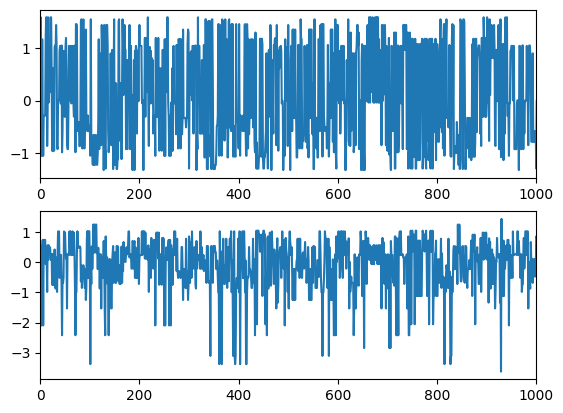

In [165]:
subplot2grid((2,1),(0,0))
plot(x_synthetic)
xlim(0,1000)
subplot2grid((2,1),(1,0))
plot(y_synthetic)
xlim(0,1000)

#plt.savefig('MSMtrajectory_10ms_double.png')

In [45]:
#Visualizing

#feat = pyemma.coordinates.featurizer(pdb)
##heavy_atom_distance_pairs = feat.pairs(feat.select_Heavy())
#feat.add_distances(heavy_atom_distance_pairs, periodic=False)






D = coor.load(trajfile, feat)
#Image(filename='./data/observable_double.png', width=500)

Obtaining file info:   0%|                                                                                  | …

getting output of FeatureReader:   0%|                                                                      | …

In [79]:
##DIDNT Read
feat2 = coor.featurizer(topfile)
feat2.add_distances(np.array([[9,33]]))
D = coor.load(trajfile, feat)
#Image(filename='./data/observable_double.png', width=500)

Obtaining file info:   0%|                               | 0/29 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/29 [00:00<?, ?it/s]

KeyboardInterrupt: 

Text(0.5, 0, 'time (10 ns)')

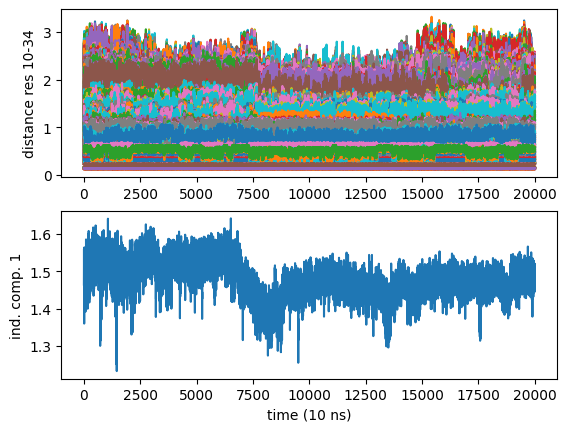

In [46]:
subplot2grid((2,1),(0,0))
plot(D[18])
ylabel('distance res 10-34')
subplot2grid((2,1),(1,0))
plot(Y[:,0])
ylabel('ind. comp. 1')
xlabel('time (10 ns)')

In [81]:
#VVHAT TO DO
D = coor.load(trajfile, feat)
dmean = average_by_state(dtrajs, D[0], M.nstates)

mplt.scatter_contour(cl.clustercenters[:,0], cl.clustercenters[:,1], dmean, colorbar=False)

Obtaining file info:   0%|                               | 0/29 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|                   | 0/29 [00:00<?, ?it/s]

AssertionError: 

Text(0, 0.5, 'mean distance')

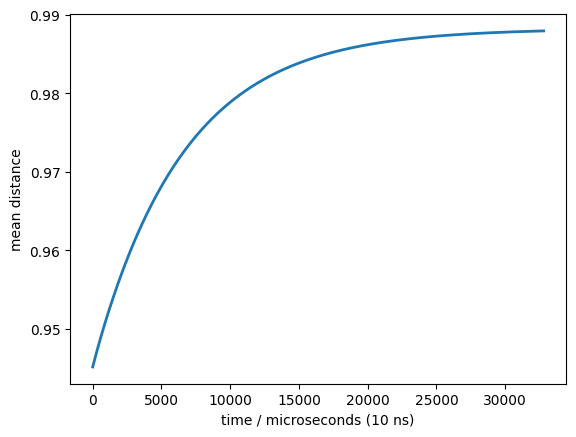

In [49]:
p0 = pcca_dist[0]
times, rel = M.relaxation(p0, dmean)
plot(times, rel, linewidth=2)
xlabel('time / microseconds (10 ns)')
ylabel('mean distance')

Text(0, 0.5, 'distance perturbation')

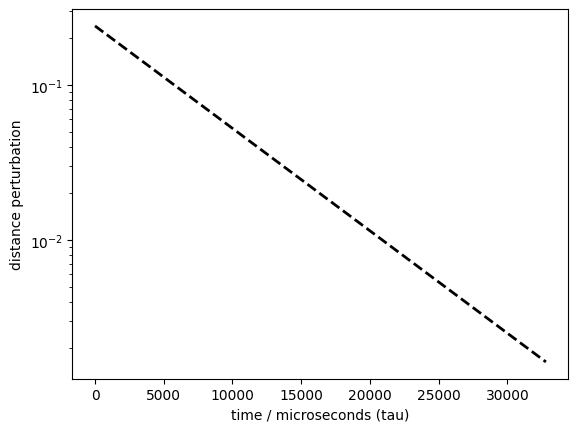

In [50]:
plot(times, rel-M.expectation(dmean), linewidth=5)
t2_tau = M.timescales()[0]
plot(times, 0.24*np.exp(-times / t2_tau), color='black', linestyle='dashed', linewidth=2)
semilogy()
xlabel('time / microseconds (tau)')
ylabel('distance perturbation')

TypeError: 'PathCollection' object is not callable

<Figure size 600x400 with 0 Axes>

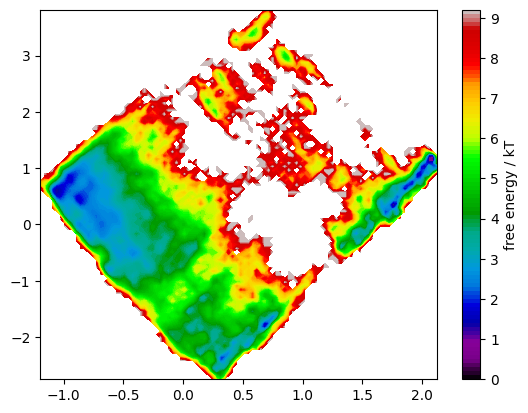

In [83]:
# do pcca with 6 states now
# M.pcca(3)
pcca_sets_6 = M.metastable_sets


# for ax in axes.flat[1:]:
#     ax.set_xlabel('IC 1')
# #     ax.set_ylabel('IC 2')
# fig.tight_layout()
 
    
figure(figsize=(6,4))
pyemma.plots.plot_free_energy(*Y.T[0:2], legacy=False)



pcca_sets = M.metastable_sets
#contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
size = 50
cols = ['white', 'blue', 'red']
for i in range(3):
    scatter(cc_x[pcca_sets_6[i]], cc_y[pcca_sets_6[i]], color=cols[i], s=size, marker = 'o', edgecolor='black')
    
    
#plt.savefig('1_TICA_latest_vvith_clustering_FINAL_double.png')

In [84]:
xavg = avg_by_set(cc_x, pcca_sets_6)
A = pcca_sets_6[xavg.argmax()]
B = pcca_sets_6[xavg.argmin()]

fluxAB = msm.tpt(M, A, B)

# mean first passage times in microseconds
print(0.01*M.mfpt(A, B))
print(0.01*M.mfpt(B, A))

991.4552388341091
583.1428046233741


In [86]:
cg, cgflux = fluxAB.coarse_grain(pcca_sets_6)

# compute mean positions of sets. This is important because of some technical points the set order
# in the coarse-grained TPT object can be different from the input order.
avgpos = np.zeros((3,2))
avgpos[:,0] = avg_by_set(cc_x, cg)
avgpos[:,1] = avg_by_set(cc_y, cg)

print(avgpos[:,0])
print(avgpos)

[ 0.35957262  0.1085148  -0.28886315]
[[ 0.35957262 -0.56819379]
 [ 0.1085148   0.02575785]
 [-0.28886315  0.1368558 ]]


In [21]:
M =pyemma.msm.estimate_markov_model(cl.dtrajs, lag=1000, dt_traj='10 ps')
nstates = 3
M.pcca(nstates) 

two_dist_msm = M
two_dist_msm.pcca(nstates)

pcca_dist = M.metastable_distributions
pcca_samples = M.sample_by_distributions(pcca_dist, 1)


two_dist_mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        two_dist_mfpt[i, j] = two_dist_msm.mfpt(
            two_dist_msm.metastable_sets[i],
            two_dist_msm.metastable_sets[j])

two_dist_inverse_mfpt = np.zeros_like(two_dist_mfpt)
two_dist_nz = two_dist_mfpt.nonzero()
two_dist_inverse_mfpt[two_dist_nz] = 1.0 / two_dist_mfpt[two_dist_nz]

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(two_dist_mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))


C = []
for i in range(len(M.metastable_assignments)):
     if two_dist_msm.metastable_assignments[i] == 1:
         C.append(two_dist_msm.metastable_assignments[i])
print(len(C))
print(M.sample_by_distributions(pcca_dist, 1))

MFPT / steps:
12
[array([[     0, 425642]]) array([[     0, 391609]])
 array([[     0, 282426]])]


In [22]:
for i, s in enumerate(two_dist_msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, two_dist_msm.pi[s].sum()))

π_1 = 0.131462
π_2 = 0.161320
π_3 = 0.707217


In [23]:
# histogram data
z,x,y = np.histogram2d(Y[:,0],Y[:,1], bins=50)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]


/tmp/ipykernel_438448/322391791.py:4: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


In [24]:
M.pcca(3)
pcca_sets_6 = M.metastable_sets

In [25]:
nstates = 3
two_dist_msm.pcca(nstates)

for i, s in enumerate(two_dist_msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, two_dist_msm.pi[s].sum()))
    
two_dist_mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        two_dist_mfpt[i, j] = two_dist_msm.mfpt(
            two_dist_msm.metastable_sets[i],
            two_dist_msm.metastable_sets[j])

two_dist_inverse_mfpt = np.zeros_like(two_dist_mfpt)
two_dist_nz = two_dist_mfpt.nonzero()
two_dist_inverse_mfpt[two_dist_nz] = 1.0 / two_dist_mfpt[two_dist_nz]

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(two_dist_mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

π_1 = 0.131462
π_2 = 0.161320
π_3 = 0.707217
MFPT / steps:


,1,2,3
1,0.00,1010987.98,86967.26
2,481960.34,0.00,236162.62
3,440949.98,1102602.22,0.00


In [26]:
B = M.metastable_assignments
print(B)
C = []
for i in range(len(two_dist_msm.metastable_assignments)):
    if two_dist_msm.metastable_assignments[i] == 1:
        C.append(two_dist_msm.metastable_assignments[i])
print(len(C))




[2 1 2 0 1 2 2 1 2 2 2 0 0 1 2 2 2 1 2 2 2 0 2 2 2 2 1 2 0 2 1 2 2 2 0 2 2
 1 2 0 2 1 2 1 2 1 2 2 0 0 2 0 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2]
12


pyemma.msm.estimators.bayesian_msm.BayesianMSM[12]: Sampling MSMs:   0%| | 0/100

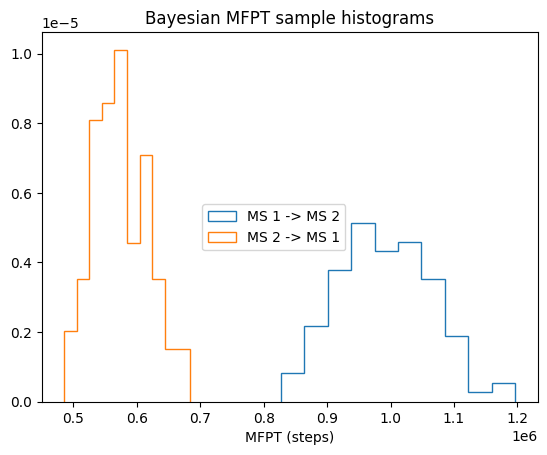

In [28]:
M= pyemma.msm.bayesian_markov_model(cl.dtrajs, lag=1000, dt_traj='10 ps')
M.pcca(3)
mfpt_sample = np.zeros((nstates, nstates, M.nsamples))
for i in range(nstates):
    for j in range(nstates):
        mfpt_sample[i, j] = M.sample_f(
            'mfpt',
            M.metastable_sets[i],
            M.metastable_sets[j])

       
fig, ax = plt.subplots()
ax.hist(mfpt_sample[0, 1], histtype='step', label='MS 1 -> MS 2', density=True)
ax.hist(mfpt_sample[1, 0], histtype='step', label='MS 2 -> MS 1', density=True)
ax.set_xlabel('MFPT (steps)')
ax.set_title('Bayesian MFPT sample histograms')
fig.legend(loc=10);

In [35]:
pcca_samples = two_dist_msm.sample_by_state(1, subset = B)

trjfile = [["/home1/wt/c1-sim1/c1-protein.xtc", "/home1/wt/c2-sim1/c2-protein.xtc", "/home1/wt/c3-sim1/c3-protein.xtc", "/home1/wt/c4-sim1/c4-protein.xtc", "/home1/wt/c5-sim1/c5-protein.xtc", "/home1/wt/c6-sim1/c6-protein.xtc", "/home1/wt/c7-sim1/c7-protein.xtc", "/home1/wt/c8-sim1/c8-protein.xtc", "/home1/wt/c9-sim1/c9-protein.xtc", "/home1/wt/c10-sim1/c10-protein.xtc", "/home1/wt/c1-sim2/c1-protein.xtc", "/home1/wt/c2-sim2/c2-protein.xtc", "/home1/wt/c3-sim2/c3-protein.xtc", "/home1/wt/c4-sim2/c4-protein.xtc", "/home1/wt/c5-sim2/c5-protein.xtc", "/home1/wt/c6-sim2/c6-protein.xtc", "/home1/wt/c7-sim2/c7-protein.xtc", "/home1/wt/c8-sim2/c8-protein.xtc", "/home1/wt/c9-sim2/c9-protein.xtc", "/home1/wt/c10-sim2/c10-protein.xtc", "/home1/wt/c1-sim3/c1-protein.xtc", "/home1/wt/c2-sim3/c2-protein.xtc", "/home1/wt/c3-sim3/c3-protein.xtc", "/home1/wt/c4-sim3/c4-protein.xtc", "/home1/wt/c5-sim3/c5-protein.xtc", "/home1/wt/c6-sim3/c6-protein.xtc", "/home1/wt/c7-sim3/c7-protein.xtc", "/home1/wt/c8-sim3/c8-protein.xtc", "/home1/wt/c9-sim3/c9-protein.xtc", "/home1/wt/c10-sim3/c10-protein.xtc"
]]


short_dist = pyemma.coordinates.source(trjfile, features=feat)
print(pcca_samples)
pyemma.coordinates.save_trajs(
    short_dist,
    pcca_samples,
    prefix = 'WT_STRUCTURE_TOR',
    fmt = 'pdb')

[array([[     0, 453144]]) array([[     0, 401723]])
 array([[     0, 569946]]) array([[     0, 352440]])
 array([[     0, 437073]]) array([[     0, 466863]])
 array([[     0, 252381]]) array([[     0, 435704]])
 array([[     0, 267734]]) array([[     0, 154232]])
 array([[     0, 578563]]) array([[     0, 101583]])
 array([[     0, 101260]]) array([[     0, 186745]])
 array([[     0, 265325]]) array([[    0, 70334]])
 array([[     0, 325601]]) array([[     0, 227970]])
 array([[     0, 520507]]) array([[     0, 571606]])
 array([[     0, 294742]]) array([[     0, 353378]])
 array([[    0, 87883]]) array([[     0, 178425]])
 array([[     0, 493707]]) array([[     0, 278977]])
 array([[     0, 186577]]) array([[     0, 500464]])
 array([[     0, 353931]]) array([[     0, 304323]])
 array([[     0, 436249]]) array([[     0, 498460]])
 array([[     0, 448289]]) array([[     0, 534073]])
 array([[     0, 170867]]) array([[     0, 359595]])
 array([[     0, 304405]]) array([[     0, 185128]

['WT_STRUCTURE_TOR000000.pdb',
 'WT_STRUCTURE_TOR000001.pdb',
 'WT_STRUCTURE_TOR000002.pdb',
 'WT_STRUCTURE_TOR000003.pdb',
 'WT_STRUCTURE_TOR000004.pdb',
 'WT_STRUCTURE_TOR000005.pdb',
 'WT_STRUCTURE_TOR000006.pdb',
 'WT_STRUCTURE_TOR000007.pdb',
 'WT_STRUCTURE_TOR000008.pdb',
 'WT_STRUCTURE_TOR000009.pdb',
 'WT_STRUCTURE_TOR000010.pdb',
 'WT_STRUCTURE_TOR000011.pdb',
 'WT_STRUCTURE_TOR000012.pdb',
 'WT_STRUCTURE_TOR000013.pdb',
 'WT_STRUCTURE_TOR000014.pdb',
 'WT_STRUCTURE_TOR000015.pdb',
 'WT_STRUCTURE_TOR000016.pdb',
 'WT_STRUCTURE_TOR000017.pdb',
 'WT_STRUCTURE_TOR000018.pdb',
 'WT_STRUCTURE_TOR000019.pdb',
 'WT_STRUCTURE_TOR000020.pdb',
 'WT_STRUCTURE_TOR000021.pdb',
 'WT_STRUCTURE_TOR000022.pdb',
 'WT_STRUCTURE_TOR000023.pdb',
 'WT_STRUCTURE_TOR000024.pdb',
 'WT_STRUCTURE_TOR000025.pdb',
 'WT_STRUCTURE_TOR000026.pdb',
 'WT_STRUCTURE_TOR000027.pdb',
 'WT_STRUCTURE_TOR000028.pdb',
 'WT_STRUCTURE_TOR000029.pdb',
 'WT_STRUCTURE_TOR000030.pdb',
 'WT_STRUCTURE_TOR000031.pdb',
 'WT_STR

estimating MaximumLikelihoodMSM:   0%|                    | 0/9 [00:00<?, ?it/s]

/home/rajarshi/miniconda3/lib/python3.9/site-packages/deeptime/markov/tools/analysis/_api.py:256: UserWarning: truncated eigendecomposition to contain 73 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


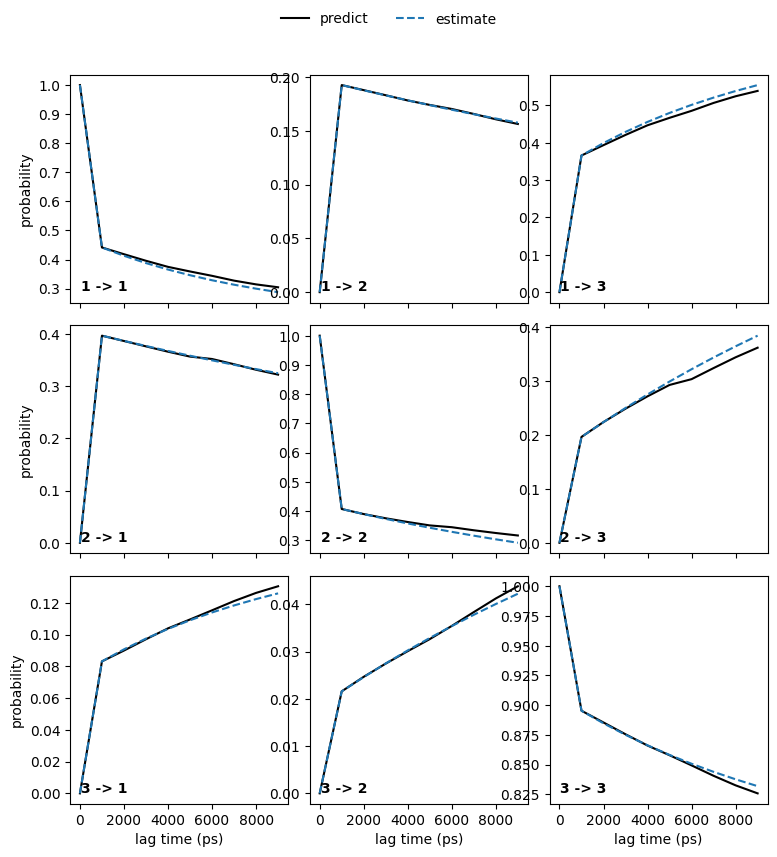

In [75]:
#CK


pyemma.plots.plot_cktest(M.cktest(3), units='ps', y01=False, padding_top=0.08);
#as we can see 4 metastable states is a good number of states
plt.savefig("CK_amberidp_all_distances.png",dpi=600,transparent=True, bbox_inches='tight')

pyemma.msm.estimators.bayesian_msm.BayesianMSM[100]: Sampling MSMs:   0%|         | 0/100 [00:00<?, ?it/s]

/home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/rajarshi/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                       | 0/29 [00:00<?, ?it/s]

getting output of TICA:   0%|                                                      | 0/29 [00:00<?, ?it/s]

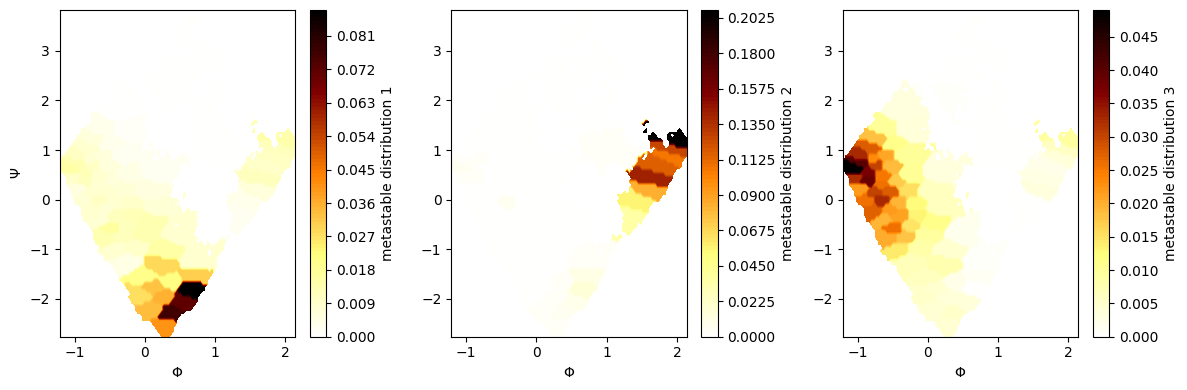

In [39]:
short_dist_msm_tica = M
short_dist_msm_tica.pcca(3)

short_dist_dtrajs_concatenated = np.concatenate(cl.dtrajs)

short_dist_msm_tica = pyemma.msm.bayesian_markov_model(cl.dtrajs, lag=1, dt_traj='10 ps')
short_dist_msm_tica.pcca(3)
short_dist_tica = pyemma.coordinates.tica(data, lag=1)
short_dist_tica_output = short_dist_tica.get_output()

short_dist_tica_concatenated = np.concatenate(short_dist_tica_output)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *short_dist_tica_concatenated.T[:2],
        M.metastable_distributions[i][short_dist_dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r', 
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('$\Phi$')
axes[0].set_ylabel('$\Psi$')
fig.tight_layout()

In [100]:
paths, path_fluxes = cgflux.pathways(fraction=0.99)
print('percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print((path_fluxes[i] / np.sum(path_fluxes)),' \t', paths[i])

percentage       	path
-------------------------------------
0.9719898900006876  	 [0 2]
0.02801010999931235  	 [0 1 2]


In [ ]:
#START OF NEW Coding 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import mdshare
import mdtraj as md
import MDAnalysis as mda
#import nglview
import pyemma
from pyemma.util.contexts import settings
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as peplt
%pylab inline

import pyemma

pyemma.__version__

'2.5.5+9.ge9257b9.dirty'


import numpy as np
%pylab inline

print('heyo')

import pyemma.coordinates as coor

# some helper funcs
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res

def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg


trajfile = ["/home1/al/c1-sim1/c1-protein.xtc", "/home1/al/c2-sim1/c2-protein.xtc", "/home1/al/c3-sim1/c3-protein.xtc", "/home1/al/c4-sim1/c4-protein.xtc", "/home1/al/c5-sim1/c5-protein.xtc", "/home1/al/c6-sim1/c6-protein.xtc", "/home1/al/c7-sim1/c7-protein.xtc", "/home1/al/c8-sim1/c8-protein.xtc", "/home1/al/c9-sim1/c9-protein.xtc", "/home1/al/c10-sim1/c10-protein.xtc", "/home1/al/c1-sim2/c1-protein.xtc", "/home1/al/c2-sim2/c2-protein.xtc", "/home1/al/c3-sim2/c3-protein.xtc", "/home1/al/c4-sim2/c4-protein.xtc", "/home1/al/c5-sim2/c5-protein.xtc", "/home1/al/c6-sim2/c6-protein.xtc", "/home1/al/c7-sim2/c7-protein.xtc", "/home1/al/c8-sim2/c8-protein.xtc", "/home1/al/c9-sim2/c9-protein.xtc", "/home1/al/c10-sim2/c10-protein.xtc", "/home1/al/c1-sim3/c1-protein.xtc", "/home1/al/c2-sim3/c2-protein.xtc", "/home1/al/c3-sim3/c3-protein.xtc", "/home1/al/c4-sim3/c4-protein.xtc", "/home1/al/c5-sim3/c5-protein.xtc", "/home1/al/c6-sim3/c6-protein.xtc", "/home1/al/c7-sim3/c7-protein.xtc", "/home1/al/c8-sim3/c8-protein.xtc", "/home1/al/c9-sim3/c9-protein.xtc", "/home1/al/c10-sim3/c10-protein.xtc"
]
topfile = '/home1/a
l/al-protein.gro'


xtc_traj = md.load (trajfile, top='/home1/al/al-protein.gro')

pdb = md.load ('/home1/al/al-protein.gro')

import MDAnalysis as mda

# Load your .gro and .xtc files
universe = mda.Universe("/home1/al/al-protein.gro", "/home1/al/c1-sim1/c1-protein.xtc")

# Get timestep from the first two frames
timestep = universe.trajectory[1].time - universe.trajectory[0].time
print(f"Timestep: {timestep} ps")




feat = pyemma.coordinates.featurizer(pdb)
# heavy_atom_distance_pairs = feat.pairs(feat.select_Heavy())


feat.add_distances_ca(periodic=True, excluded_neighbors=2)
data = pyemma.coordinates.load(trajfile, features=feat)




inp = coor.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length)
print('number of dimension = ',inp.dimension())

lag=10
tica_obj = coor.tica(inp, lag=lag, dim=2, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
# Y = tica_obj.get_output()[0]

Y7 = [
    tica_obj.get_output()[0], 
    tica_obj.get_output()[1], 
    tica_obj.get_output()[2], 
    tica_obj.get_output()[3],
    tica_obj.get_output()[4],
    tica_obj.get_output()[5],
    tica_obj.get_output()[6],
    tica_obj.get_output()[7],
    tica_obj.get_output()[8],
    tica_obj.get_output()[9],
    tica_obj.get_output()[10],
    tica_obj.get_output()[11],
    tica_obj.get_output()[12],
    tica_obj.get_output()[13],
    tica_obj.get_output()[14],
    tica_obj.get_output()[15],
    tica_obj.get_output()[16],
    tica_obj.get_output()[17],
    tica_obj.get_output()[18],
    tica_obj.get_output()[19],
    tica_obj.get_output()[20],
    tica_obj.get_output()[21],
    tica_obj.get_output()[22],
    tica_obj.get_output()[23],
    tica_obj.get_output()[24],
    tica_obj.get_output()[25],
    tica_obj.get_output()[26],
    tica_obj.get_output()[27],
    tica_obj.get_output()[28]
    ]

Y = np.vstack(Y7)

# Y = tica_obj.get_output()[0]
print('Projected data shape = ', Y.shape)

# feat2 = coor.featurizer(topfile)
# feat2.add_distances_ca(periodic=False)
# Y = tica_obj.get_output()[0]


# inp = coor.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

# Y = np.vstack(tica_obj.get_output())
print('Projected data shape = ', Y.shape)

# feat2 = coor.featurizer(topfile)
# feat2.add_distances_ca(periodic=False)


print(Y.shape)
print(type(Y))
# Y1 = tica_obj.get_output()[0]

print(Y1.shape)
print(type(Y1))

a= [9,7,8]
b = [1,3,4]
c=[]
c= np.concatenate((a,b))

print(c)

Y = tica_obj.get_output()[0]
print(Y, Y.shape)

Y = np.concatenate(tica_obj.get_output())
print(Y, Y.shape)

# inp_ = coor.source(trajfile, feat2)
# tica_obj_ = coor.tica(inp_, lag=lag, dim=2)
# Y4 = np.vstack(tica_obj.get_output())


subplot2grid((2,1),(0,0))
plot(Y[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y[:,1])
ylabel('ind. comp. 2')
xlabel('time (10 ps)')

plt.savefig('1_TICA_plot_al.png')

type(Y4)

#TRYING TICA PLOTS
Y_ = tica_obj.get_output()[0]
km = coor.cluster_kmeans(Y_, k=75)
# histogram data
z_,x_,y_ = np.histogram2d(Y_[:,0],Y_[:,1], bins=50)
# compute free energies
F_ = -np.log(z_)
# contour plot
extent_ = [x_[0], x_[-1], y_[0], y_[-1]]
# plot
contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
plot(km.clustercenters[:,0],km.clustercenters[:,1], linewidth=0, marker='o')
#plt.savefig('1_TICA_clustering_overenergy_landscape_al.png')

pyemma.plots.plot_free_energy(F_.T, legacy=False)

cl = coor.cluster_kmeans(data=Y, k=75, max_iter = 500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

import matplotlib.pyplot as plt

# Metastable state assignments (B)
assignments = two_dist_msm.metastable_assignments

# Identify cluster centers (cc_x, cc_y) assigned to metastable state 1
metastable_indices = [i for i, state in enumerate(assignments) if state == 1]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]

# Scatter plot for all cluster centers
plt.scatter(cc_x, cc_y, color='gray', label='Other metastable states', alpha=0.5)

# Highlight cluster centers corresponding to metastable state 1
plt.scatter(metastable_x, metastable_y, color='red', label='Metastable state 1', s=50)

# Add labels and legend
plt.xlabel("Cluster Center X")
plt.ylabel("Cluster Center Y")
plt.title("Scatter Plot of Cluster Centers with Metastable State 1 Highlighted")
plt.legend()
plt.show()


import matplotlib.pyplot as plt

# Scatter plot for all cluster centers
plt.scatter(cc_x, cc_y, color='gray', label='All Cluster Centers', alpha=0.5)

# Loop through all cluster centers and annotate with their index in B
for i, (x, y) in enumerate(zip(cc_x, cc_y)):
    plt.text(x, y, f'{i}', color='blue', fontsize=8, ha='center', va='center')

# Highlight points corresponding to metastable state 1
metastable_indices = [i for i, state in enumerate(B) if state == 1]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]
plt.scatter(metastable_x, metastable_y, color='red',alpha = 0.3, label='Metastable State 1', s=50)

# Highlight points corresponding to metastable state 2
metastable_indices = [i for i, state in enumerate(B) if state == 2]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]
plt.scatter(metastable_x, metastable_y, color='blue',alpha = 0.3, label='Metastable State 2', s=50)

# Highlight points corresponding to metastable state 0
metastable_indices = [i for i, state in enumerate(B) if state == 0]
metastable_x = cc_x[metastable_indices]
metastable_y = cc_y[metastable_indices]
plt.scatter(metastable_x, metastable_y, color='green',alpha = 0.3, label='Metastable State 0', s=50)



# Add labels, legend, and title
plt.xlabel("Cluster Center X")
plt.ylabel("Cluster Center Y")
plt.title("Cluster Centers Annotated with Indices from B")
plt.legend()
plt.show()


#contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
#plot(km.clustercenters[:,0],km.clustercenters[:,1], linewidth=0, marker='o')
# Y4 = tica_obj.get_output()
plt.figure(figsize=(6, 4)) 
short_dist_tica_concatenated = np.concatenate(Y)
pyemma.plots.plot_free_energy(*Y.T[0:2], legacy=False)

plot(cc_x,cc_y, linewidth=0, marker='o', markerfacecolor='white',  # Fill color of the marker
    markeredgecolor='black', markeredgewidth=0.6,  # Thickness of the border
    markersize=5 ) 
plt.xlabel('IC 1')
plt.ylabel('IC 2')
plt.show()
print(short_dist_tica_concatenated)


plt.show()

data = pyemma.coordinates.load(trajfile, features=feat)

def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


lags = [1,1000, 3000, 4000]
dims = [i + 1 for i in range(10)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.01))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()

print('Mean values: ', np.mean(Y[0], axis=0))
print('Variances:   ', np.var(Y[0], axis=0))

print(-lag/np.log(tica_obj.eigenvalues[:5]))

# histogram data
z,x,y = np.histogram2d(Y4[0][:,0],Y4[0][:,1], bins=100)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

#plt.savefig('1_contour_plot_nevv_al.png')

cl = coor.cluster_kmeans(data=Y, k=75, max_iter = 500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')

#plt.savefig('1_clustered_contour_plot_nevv_double.png')

cl.dtrajs

#Diffrent clustering method

clu = coor.cluster_uniform_time(data=Y, k=30)
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(clu.clustercenters[:,0], clu.clustercenters[:,1], linewidth=0, marker='o')

#plt.savefig('1_effective_contour_plot_nevv_double.png')

clr = coor.cluster_regspace(data=Y, dmin=0.5)
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(clr.clustercenters[:,0], clr.clustercenters[:,1], linewidth=0, marker='o')

#plt.savefig('1_uniform_contour_plot_nevv_double.png')

print('a')

#Do everything in memory

X = coor.load(trajfile, feat)
Y1 = coor.tica(X, lag=lag, dim=2).get_output()
km = coor.cluster_kmeans(Y1, k=30)
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
# sign of -km.clustercenters[:,0] is changed here to be correct in the plot.
# the direction may change due to a random initialization of the eigenvectors.
plot(km.clustercenters[:,0], km.clustercenters[:,1], linewidth=0, marker='o')

#plt.savefig('1_memory_based_clustering_contour_nevv_double.png')

#Do everything in pipeline

stage1 = coor.source(trajfile, feat)
stage2 = coor.tica(lag=lag, dim=2)
stage3 = coor.cluster_kmeans(k=30)
coor.pipeline([stage1,stage2,stage3])
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(stage3.clustercenters[:,0],stage3.clustercenters[:,1], linewidth=0, marker='o')

#plt.savefig('1_pipeline_based_contour_nevv_double.png')

#%time coor.cluster_kmeans(data=Y, k=100, stride=1)

%time coor.cluster_kmeans(data=Y, k=100, stride=1)

#Different coordinates_1

feat2 = coor.featurizer(topfile)
feat2.add_distances_ca(periodic=False)
inp_ = coor.source(trajfile, feat2)
print('number of dimension = ', inp_.dimension())
tica_obj_ = coor.tica(inp_, lag=lag, dim=2)
# plot
Y_ = tica_obj_.get_output()[0]
subplot2grid((2,1),(0,0))
plot(Y_[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y_[:,1])
ylabel('ind. comp. 2')
xlabel('time (10 ns)')


plt.savefig('1_diff_coordinates_clustering_contour_nevv_al_ca.png')

#Different coordinates_2

feat2 = coor.featurizer(topfile)
feat2.add_backbone_torsions(periodic=False)
inp_ = coor.source(trajfile, feat2)
print('number of dimension = ', inp_.dimension())
tica_obj_ = coor.tica(inp_, lag=lag, dim=2)
# plot
Y_ = tica_obj_.get_output()[0]
subplot2grid((2,1),(0,0))
plot(Y_[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y_[:,1])
ylabel('ind. comp. 2')
xlabel('time (10 ns)')


plt.savefig('1_diff_coordinates_clustering_contour_nevv_al_bt.png')

#Different coordinates_3

mindistances_feat = pyemma.coordinates.featurizer(pdb)
feat.add_residue_mindist(periodic=False)


#feat2 = coor.featurizer(topfile)
#feat2.add_distances_ca(periodic=False)
inp_ = coor.source(trajfile, mindistances_feat)
print('number of dimension = ', inp_.dimension())
tica_obj_ = coor.tica(inp_, lag=lag, dim=2)
# plot
Y_ = tica_obj_.get_output()[0]
subplot2grid((2,1),(0,0))
plot(Y_[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y_[:,1])
ylabel('ind. comp. 2')
xlabel('time (10 ns)')


plt.savefig('1_diff_coordinates_clustering_contour_nevv_al_mindis.png')

# cluster
km = coor.cluster_kmeans(Y_, k=100)
# histogram data
z_,x_,y_ = np.histogram2d(Y_[:,0],Y_[:,1], bins=50)
# compute free energies
F_ = -np.log(z_)
# contour plot
extent_ = [x_[0], x_[-1], y_[0], y_[-1]]
# plot
contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
plot(km.clustercenters[:,0],km.clustercenters[:,1], linewidth=0, marker='o')

#plt.savefig('1_diff_coordinates_clustering_contour_nevv_double.png')

#MSM_Estimation
import pyemma.msm as msm
import pyemma.plots as mplt


lags = [1,2,5,10,20,50,100,200]

its = msm.its(dtrajs, lags=lags)


feat = pyemma.coordinates.featurizer(pdb)
heavy_atom_distance_pairs = feat.pairs(feat.select_Heavy())


feat.add_distances(heavy_atom_distance_pairs, periodic=False)


torsion_data = pyemma.coordinates.load(trajectory_files, features=feat)
labels = ['torsions\nangel']






tica = coor.tica(torsion_data,lag=100)
tica_output = tica.get_output()
#print(Y)
tica_concatenated = np.concatenate(tica_output)
print(tica_concatenated.shape)

cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=30, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)






lags = [1,2,5,50, 100, 150, 200 ,250]
its = pyemma.msm.its(cl.dtrajs, lags=lags, nits=10, errors='bayes')

pyemma.plots.plot_implied_timescales(its, dt=0.1, units='(ns)' , marker='None');

plt.xlabel('τ (ns)')
plt.ylabel('ti (ns)')

import pyemma.msm as msm
import pyemma.plots as mplt

#mplt.plot_implied_timescales(its)

#plt.savefig('1_ITS_Plot_Nevv_double.png')


plt.savefig('1_ITS_PLOT_al.png')
#K means

dtrajs_concatenated = np.concatenate(cl.dtrajs)


dtrajs_concatenated = np.concatenate(cl.dtrajs)

print('hi')

M = msm.estimate_markov_model(dtrajs_concatenated, 1000)

print(len(dtrajs[0]))

print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

plot(M.timescales(),linewidth=0,marker='o')
xlabel('index'); ylabel('timescale (ns)'); xlim(-0.5,10.5)

#plt.savefig('time_scalevsindex_double.png')

plot(M.timescales()[:-1]/M.timescales()[1:], linewidth=0,marker='o')
xlabel('index'); ylabel('timescale separation'); xlim(-0.5,10.5)

#plt.savefig('timescale_seperationvsindex_double.png')

r2 = M.eigenvectors_right()[:,1]
ax = mplt.scatter_contour(cc_x, cc_y, r2)

#plt.savefig('second_right_eigen_vector_double.png')

r3 = M.eigenvectors_right()[:,2]
mplt.scatter_contour(cc_x, cc_y, r3)

#plt.savefig('third_right_eigen_vector_double.png')

M.pcca(3)
pcca_dist = M.metastable_distributions
f, (ax1,ax2,ax3) = subplots(ncols=3)
f.set_size_inches(15,5)
cmap=plt.cm.Blues
mplt.scatter_contour(cc_x, cc_y, pcca_dist[0], fig=f, ax=ax1, colorbar=False, cmap=cmap)
mplt.scatter_contour(cc_x, cc_y, pcca_dist[1], fig=f, ax=ax2, colorbar=False, cmap=cmap)
mplt.scatter_contour(cc_x, cc_y, pcca_dist[2], fig=f, ax=ax3, colorbar=False, cmap=cmap)

#plt.savefig('Coarse_graining_double.png')

index_traj = M.generate_traj(100000)

I = index_traj[:,1]
dtraj_synthetic = M.discrete_trajectories_full[0][I]
x_synthetic = cl.clustercenters[dtraj_synthetic,0]
y_synthetic = cl.clustercenters[dtraj_synthetic,1]

subplot2grid((2,1),(0,0))
plot(x_synthetic)
xlim(0,1000)
subplot2grid((2,1),(1,0))
plot(y_synthetic)
xlim(0,1000)

#plt.savefig('MSMtrajectory_10ms_double.png')

pcca_samples = M.sample_by_distributions(pcca_dist, 1000)

coor.save_traj(inp, pcca_samples[0], 'pcca1.xtc')
coor.save_traj(inp, pcca_samples[1], 'pcca2.xtc')
coor.save_traj(inp, pcca_samples[2], 'pcca3.xtc')

##VISUALIZING

#from IPython.display import Image
#Image(filename='./data/pcca_structures.png', width=800)

figure(figsize=(8,5))
pcca_sets = M.metastable_sets
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
scatter(cl.clustercenters[pcca_sets[0],0], cl.clustercenters[pcca_sets[0],1], color='red', s=50)
scatter(cl.clustercenters[pcca_sets[1],0], cl.clustercenters[pcca_sets[1],1], color='blue', s=50)
scatter(cl.clustercenters[pcca_sets[2],0], cl.clustercenters[pcca_sets[2],1], color='green', s=50)

plt.savefig('1_Crisp_clustering_by_PCCA_al.png')

#Visualizing

#feat = pyemma.coordinates.featurizer(pdb)
##heavy_atom_distance_pairs = feat.pairs(feat.select_Heavy())
#feat.add_distances(heavy_atom_distance_pairs, periodic=False)






D = coor.load(trajfile, feat)
#Image(filename='./data/observable_double.png', width=500)

##DIDNT Read
feat2 = coor.featurizer(topfile)
feat2.add_distances(np.array([[9,33]]))
D = coor.load(trajfile, feat2)
#Image(filename='./data/observable_double.png', width=500)

subplot2grid((2,1),(0,0))
plot(D[18])
ylabel('distance res 10-34')
subplot2grid((2,1),(1,0))
plot(Y[:,0])
ylabel('ind. comp. 1')
xlabel('time (10 ns)')

#VVHAT TO DO

dmean = average_by_state(dtrajs[0], D[0], M.nstates)

mplt.scatter_contour(cl.clustercenters[:,0], cl.clustercenters[:,1], dmean, colorbar=False)

M.expectation(dmean)

times, corr = M.correlation(dmean)
plot(times, corr, linewidth=2)
xlabel('time / microseconds (10 ns)')
ylabel('autocorrelation')

p0 = pcca_dist[0]
times, rel = M.relaxation(p0, dmean)
plot(times, rel, linewidth=2)
xlabel('time / microseconds (10 ns)')
ylabel('mean distance')

plot(times, rel-M.expectation(dmean), linewidth=5)
t2_tau = M.timescales()[0]
plot(times, 0.24*np.exp(-times / t2_tau), color='black', linestyle='dashed', linewidth=2)
semilogy()
xlabel('time / microseconds (tau)')
ylabel('distance perturbation')

# do pcca with 6 states now
M.pcca(3)
pcca_sets_6 = M.metastable_sets


# for ax in axes.flat[1:]:
#     ax.set_xlabel('IC 1')
# #     ax.set_ylabel('IC 2')
# fig.tight_layout()
 
    
figure(figsize=(6,4))
pyemma.plots.plot_free_energy(*short_dist_tica_concatenated.T[0:2], legacy=False)



pcca_sets = M.metastable_sets
#contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
size = 50
cols = ['white', 'blue', 'red']
for i in range(3):
    scatter(cc_x[pcca_sets_6[i]], cc_y[pcca_sets_6[i]], color=cols[i], s=size, marker = 'o', edgecolor='black')
    
    
#plt.savefig('1_TICA_latest_vvith_clustering_FINAL_double.png')

xavg = avg_by_set(cc_x, pcca_sets_6)
A = pcca_sets_6[xavg.argmax()]
B = pcca_sets_6[xavg.argmin()]

fluxAB = msm.tpt(M, A, B)

# mean first passage times in microseconds
print(0.01*M.mfpt(A, B))
print(0.01*M.mfpt(B, A))

figure(figsize=(8,5))
mplt.scatter_contour(cl.clustercenters[:,0], cl.clustercenters[:,1], fluxAB.committor, colorbar=True, ncontours=15)
scatter(cl.clustercenters[A,0], cl.clustercenters[A,1], color='black', s=200)
scatter(cl.clustercenters[B,0], cl.clustercenters[B,1], color='white', s=200)

#plt.savefig('1_clustering_something_calculated_via_TPT_double.png')

cg, cgflux = fluxAB.coarse_grain(pcca_sets_6)

# compute mean positions of sets. This is important because of some technical points the set order
# in the coarse-grained TPT object can be different from the input order.
avgpos = np.zeros((3,2))
avgpos[:,0] = avg_by_set(cc_x, cg)
avgpos[:,1] = avg_by_set(cc_y, cg)

print(avgpos[:,0])
print(avgpos)

M =pyemma.msm.estimate_markov_model(cl.dtrajs, lag=1000, dt_traj='10 ps')
nstates = 3
M.pcca(nstates) 
two_dist_msm = M
# pyemma.msm.bayesian_markov_model(cl.dtrajs, lag=1000, dt_traj='10 ps')
two_dist_msm.pcca(nstates)

two_dist_mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        two_dist_mfpt[i, j] = two_dist_msm.mfpt(
            two_dist_msm.metastable_sets[i],
            two_dist_msm.metastable_sets[j])

two_dist_inverse_mfpt = np.zeros_like(two_dist_mfpt)
two_dist_nz = two_dist_mfpt.nonzero()
two_dist_inverse_mfpt[two_dist_nz] = 1.0 / two_dist_mfpt[two_dist_nz]

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(two_dist_mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))


C = []
for i in range(len(M.metastable_assignments)):
     if two_dist_msm.metastable_assignments[i] == 1:
         C.append(two_dist_msm.metastable_assignments[i])
print(len(C))
print(M.sample_by_distributions(pcca_dist, 1))

pcca_dist = M.metastable_distributions
pcca_samples = M.sample_by_distributions(pcca_dist, 1)

for i, s in enumerate(two_dist_msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, two_dist_msm.pi[s].sum()))

# histogram data
z,x,y = np.histogram2d(Y[:,0],Y[:,1], bins=50)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]


M.pcca(3)
pcca_sets_6 = M.metastable_sets

nstates = 3
M.pcca(nstates)

for i, s in enumerate(two_dist_msm.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, two_dist_msm.pi[s].sum()))
    
two_dist_mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        two_dist_mfpt[i, j] = two_dist_msm.mfpt(
            two_dist_msm.metastable_sets[i],
            two_dist_msm.metastable_sets[j])

two_dist_inverse_mfpt = np.zeros_like(two_dist_mfpt)
two_dist_nz = two_dist_mfpt.nonzero()
two_dist_inverse_mfpt[two_dist_nz] = 1.0 / two_dist_mfpt[two_dist_nz]

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(two_dist_mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

B = M.metastable_assignments
print(B)
C = []
for i in range(len(two_dist_msm.metastable_assignments)):
    if two_dist_msm.metastable_assignments[i] == 1:
        C.append(two_dist_msm.metastable_assignments[i])
print(len(C))




M= pyemma.msm.bayesian_markov_model(cl.dtrajs, lag=1000, dt_traj='10 ps')
M.pcca(3)
mfpt_sample = np.zeros((nstates, nstates, M.nsamples))
for i in range(nstates):
    for j in range(nstates):
        mfpt_sample[i, j] = M.sample_f(
            'mfpt',
            M.metastable_sets[i],
            M.metastable_sets[j])

       
fig, ax = plt.subplots()
ax.hist(mfpt_sample[0, 1], histtype='step', label='MS 1 -> MS 2', density=True)
ax.hist(mfpt_sample[1, 0], histtype='step', label='MS 2 -> MS 1', density=True)
ax.set_xlabel('MFPT (steps)')
ax.set_title('Bayesian MFPT sample histograms')
fig.legend(loc=10);

pcca_samples = two_dist_msm.sample_by_state(0, subset = B)

trjfile = [["/home1/al/c1-sim1/c1-protein.xtc", "/home1/al/c2-sim1/c2-protein.xtc", "/home1/al/c3-sim1/c3-protein.xtc", "/home1/al/c4-sim1/c4-protein.xtc", "/home1/al/c5-sim1/c5-protein.xtc", "/home1/al/c6-sim1/c6-protein.xtc", "/home1/al/c7-sim1/c7-protein.xtc", "/home1/al/c8-sim1/c8-protein.xtc", "/home1/al/c9-sim1/c9-protein.xtc", "/home1/al/c10-sim1/c10-protein.xtc", "/home1/al/c1-sim2/c1-protein.xtc", "/home1/al/c2-sim2/c2-protein.xtc", "/home1/al/c3-sim2/c3-protein.xtc", "/home1/al/c4-sim2/c4-protein.xtc", "/home1/al/c5-sim2/c5-protein.xtc", "/home1/al/c6-sim2/c6-protein.xtc", "/home1/al/c7-sim2/c7-protein.xtc", "/home1/al/c8-sim2/c8-protein.xtc", "/home1/al/c9-sim2/c9-protein.xtc", "/home1/al/c10-sim2/c10-protein.xtc", "/home1/al/c1-sim3/c1-protein.xtc", "/home1/al/c2-sim3/c2-protein.xtc", "/home1/al/c3-sim3/c3-protein.xtc", "/home1/al/c4-sim3/c4-protein.xtc", "/home1/al/c5-sim3/c5-protein.xtc", "/home1/al/c6-sim3/c6-protein.xtc", "/home1/al/c7-sim3/c7-protein.xtc", "/home1/al/c8-sim3/c8-protein.xtc", "/home1/al/c9-sim3/c9-protein.xtc", "/home1/al/c10-sim3/c10-protein.xtc"
]]


short_dist = pyemma.coordinates.source(trjfile, features=feat)
print(pcca_samples)
pyemma.coordinates.save_trajs(
    short_dist,
    pcca_samples,
    prefix = 'Rep_str_state_0_',
    fmt = 'pdb')

#CK


pyemma.plots.plot_cktest(M.cktest(2), units='ps', y01=False, padding_top=0.08);
#as we can see 4 metastable states is a good number of states
plt.savefig("CK_amberidp_all_distances.png",dpi=600,transparent=True, bbox_inches='tight')



import matplotlib.pyplot as plt
from pyemma.plots import plot_free_energy
import pyemma.plots as mplt

# Create a figure and axes


# Plot free energy on the same axes
plot_free_energy(
    *short_dist_tica_concatenated.T[0:2],
    legacy=False,
    ax=ax  # Pass the axes object to plot on
)

# Plot flux on the same axes
fig, _ = mplt.plot_flux(
    cgflux,
    avgpos,
    cgflux.stationary_distribution,
    max_width=4,
    max_height=4,
    ax=ax  # Use the same axes for the flux plot
)



# fig.set_size_inches(4,4)
# fig, ax = plt.subplots()
pyemma.plots.plot_free_energy(*short_dist_tica_concatenated.T[0:2], legacy=False)

fig, _ = mplt.plot_flux(cgflux, avgpos, cgflux.stationary_distribution,
                        max_width=4, max_height=4)



for collection in fig.axes[0].collections:
    collection.set_zorder(-1)
    
for patch in fig.axes[0].patches:
    patch.set_color('blue'
                   
                   )  
scale_factor=2    
for patch in fig.axes[0].patches:
    if isinstance(patch, plt.Circle):  # Check if the patch is a Circle
        patch.set_radius(patch.radius * scale_factor)
    else:  # For general patches that might not have 'radius'
        # Scale both the width and height
        bbox = patch.get_bbox()
        new_width = bbox.width * scale_factor
        new_height = bbox.height * scale_factor
        patch.set_bounds(bbox.x0, bbox.y0, new_width, new_height)
        
        


# Zoom out by setting the axis limits

fig, _ = mplt.plot_flux(cgflux, avgpos, cgflux.stationary_distribution,
                        max_width=10, max_height=7
                       )
cf = plt.contourf(F.T, 150, cmap=plt.cm.hot, extent=extent, fig=fig, zorder=0)
fig.set_size_inches(6,6)

for collection in fig.axes[0].collections:
    collection.set_zorder(-1)

# Change the color of the state circles to blue
for patch in fig.axes[0].patches:
    if isinstance(patch, plt.Circle):
        patch.set_color('blue')
        patch.set_radius(patch.radius * 1.5)  # Increase the size of circles
    else:
        bbox = patch.get_bbox()
        new_width = bbox.width * 1.5
        new_height = bbox.height * 1.5
        patch.set_bounds(bbox.x0, bbox.y0, new_width, new_height)

# Zoom out by adjusting the axis limits
x_min, x_max = fig.axes[0].get_xlim()
y_min, y_max = fig.axes[0].get_ylim()

scale_factor = 1.6  # Adjust as needed to zoom out more or less

fig.axes[0].set_xlim([x_min - (x_max - x_min) * (scale_factor - 1) / 2,
                      x_max + (x_max - x_min) * (scale_factor - 1) / 2])
fig.axes[0].set_ylim([y_min - (y_max - y_min) * (scale_factor - 1) / 2,
                      y_max + (y_max - y_min) * (scale_factor - 1) / 2])

plt.savefig('7.09_al_arrrow_plot.png')

fig, _ = mplt.plot_flux(cgflux, avgpos, cgflux.stationary_distribution,
                        max_width=10, max_height=7
                       )
cf = plt.contourf(F.T, 150, cmap=plt.cm.hot, extent=extent, fig=fig, zorder=0)
fig.set_size_inches(6,6)

for collection in fig.axes[0].collections:
    collection.set_zorder(-1)

# Change the color of the state circles to blue
for patch in fig.axes[0].patches:
    if isinstance(patch, plt.Circle):
        patch.set_color('blue')
        patch.set_radius(patch.radius * 1.5)  # Increase the size of circles
    else:
        bbox = patch.get_bbox()
        new_width = bbox.width * 1.5
        new_height = bbox.height * 1.5
        patch.set_bounds(bbox.x0, bbox.y0, new_width, new_height)

# Zoom out by adjusting the axis limits
x_min, x_max = fig.axes[0].get_xlim()
y_min, y_max = fig.axes[0].get_ylim()

scale_factor = 1.5  # Adjust as needed to zoom out more or less

fig.axes[0].set_xlim([x_min - (x_max - x_min) * (scale_factor - 1) / 2,
                      x_max + (x_max - x_min) * (scale_factor - 1) / 2])
fig.axes[0].set_ylim([y_min - (y_max - y_min) * (scale_factor - 1) / 2,
                      y_max + (y_max - y_min) * (scale_factor - 1) / 2])

# Set aspect ratio manually
aspect_ratio = 0.1  # Adjust this ratio as needed
fig.axes[0].set_aspect(aspect_ratio)





paths, path_fluxes = cgflux.pathways(fraction=0.99)
print('percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print((path_fluxes[i] / np.sum(path_fluxes)),' \t', paths[i])